In [1]:
%load_ext tensorboard
%tensorboard --logdir "logs/plots" --host localhost --port 6175

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scienceplots  # noqa
import seaborn as sns  # noqa

plt.style.use(["science", "grid"])
mpl.rc("text.latex", preamble=r"\usepackage{amsmath,amssymb,amsthm,mathtools,siunitx}")

In [ ]:
df0 = pd.read_csv(r"C:\Users\Dimit\Videos\baseline\tra_loss\version_0.csv")
df0["Trial"] = 1
df0

In [ ]:
df1 = pd.read_csv(r"C:\Users\Dimit\Videos\baseline\tra_loss\version_1.csv")
df1["Trial"] = 2
df1

In [ ]:
df2 = pd.read_csv(r"C:\Users\Dimit\Videos\baseline\tra_loss\version_2.csv")
df2["Trial"] = 3
df2

In [ ]:
df = pd.concat((df0, df1, df2))

In [ ]:
np.array([0.6063, 0.6033, 0.6341]).mean() * 100

In [ ]:
np.array([0.6063, 0.6033, 0.6341]).std(ddof=1) * 100

In [ ]:
fig: plt.Figure
main_ax: plt.Axes
inset_ax: plt.Axes

fig, main_ax = plt.subplots(constrained_layout=True)
fig.set_size_inches(14.35 / 2.45 * 0.707, 14.35 / 2.45 * 0.707 * 0.707)
fig.set_dpi(300)
main_ax.grid(False)

sns.lineplot(
    df,
    x="Step",
    y="Value",
    hue="Trial",
    palette=sns.color_palette("Set2", n_colors=3),
    legend=True,
    ax=main_ax,
)
plt.legend(title="Trial", fancybox=False, framealpha=0)
plt.xlabel(r"\textbf{Training Step}")
plt.ylabel(r"\textbf{Training Loss}")

inset_ax = main_ax.inset_axes((0.46, 0.527, 0.3535, 0.3535))
sns.lineplot(
    df[df.Step >= 2500],
    x="Step",
    y="Value",
    hue="Trial",
    palette=sns.color_palette("Set2", n_colors=3),
    legend=False,
    ax=inset_ax,
)
inset_ax.set_xlabel(r"\textbf{Training Step}", fontsize=10)
inset_ax.set_xticks(
    ticks=np.arange(2500, 6000, 500), labels=np.arange(2500, 6000, 500), rotation=45
)
inset_ax.set_ylabel(r"\textbf{Training Loss}", fontsize=10)
inset_ax.set_title(
    r"\textbf{$\text{Training Step} \geq 2500$}", fontsize=10, multialignment="center"
)

In [ ]:
df0 = pd.read_csv(r"C:\Users\Dimit\Videos\baseline\val_miou\version_0.csv")
df0["Trial"] = 0
df0

In [ ]:
df1 = pd.read_csv(r"C:\Users\Dimit\Videos\baseline\val_miou\version_1.csv")
df1["Trial"] = 1
df1

In [ ]:
df2 = pd.read_csv(r"C:\Users\Dimit\Videos\baseline\val_miou\version_2.csv")
df2["Trial"] = 2
df2

In [ ]:
df = pd.concat((df0, df1, df2))
df

In [ ]:
stds = []
for vals in zip(df0.Value, df1.Value, df2.Value):
    stds.append(np.std(np.asarray([*vals])))
stds = np.asarray(stds)

fig, main_ax = plt.subplots(constrained_layout=True)
fig.set_size_inches(14.35 / 2.45 * 0.707, 14.35 / 2.45 * 0.707 * 0.707)
fig.set_dpi(300)

plt.plot(df0.Step.values, stds)
plt.xlabel(r"\textbf{Training Step}")
plt.ylabel(r"\textbf{$\sigma\left(\text{Validation mIoU}\right)$}")

In [ ]:
mious = []
for i in range(3):
    mious.append(df[df.Trial == i].Value.iat[199])  # 3599 Step
mious = np.asarray(mious)
print(mious.mean() * 100)
print(mious.std(ddof=1) * 100)
print(mious.mean() - mious.std(ddof=1))
print(mious.mean() + mious.std(ddof=1))

In [2]:
import glob
import os

import geopandas as gpd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import rasterio
import scienceplots  # noqa
import seaborn as sns
import shapely

plt.style.use(["science", "grid"])
mpl.rc("text.latex", preamble=r"\usepackage{amsmath,amssymb,amsthm,mathtools,siunitx}")

In [15]:
tile = "9-368-464"

img_paths = glob.glob(
    os.path.join(r"C:\Documents\RoofSense\dataset", tile, "imgs", "*.tif")
)
msk_paths = glob.glob(
    os.path.join(r"C:\Documents\RoofSense\dataset", tile, "msks", "*.tif")
)

surfs = gpd.read_file(os.path.join(r"C:\Documents\RoofSense\temp", tile + ".surf.gpkg"))

In [16]:
len(surfs.dissolve(by="id"))

898

In [17]:
print("Building surface area:")
surfs.area.sum()

Building surface area:


123185.25337200201

In [18]:
bbxs = []
cls_counts = {}
for path in msk_paths:
    src: rasterio.io.DatasetReader
    with rasterio.open(path) as src:
        bbxs.append(shapely.box(*src.bounds))
        msk = src.read(indexes=1)
    temp = np.zeros(9)
    clss, counts = np.unique(msk, return_counts=True)
    temp[clss] = counts
    cls_counts[os.path.basename(path)] = temp
cls_counts = pd.DataFrame.from_dict(cls_counts).sum(axis=1).values[1:]
cls_counts

array([1140348.,  664913., 1501364.,   35611.,  771032.,  299521.,
        161286.,   31142.])

In [23]:
temp

array([158348.,  65174.,      0.,  38622.,      0.,      0.,      0.,
            0.,      0.])

In [20]:
bbxs = gpd.GeoDataFrame(dict(col1=range(len(bbxs)), geometry=bbxs), crs="EPSG:28992")
bbxs

,col1,geometry
0,0,"POLYGON ((106282.64 423876.48, 106282.64 42391..."
1,1,"POLYGON ((106282.64 423466.88, 106282.64 42350..."
2,2,"POLYGON ((106364.56 423466.88, 106364.56 42350..."
3,3,"POLYGON ((106405.52 423466.88, 106405.52 42350..."
4,4,"POLYGON ((106077.84 423425.92, 106077.84 42346..."
5,5,"POLYGON ((106200.72 423425.92, 106200.72 42346..."
6,6,"POLYGON ((106241.68 423425.92, 106241.68 42346..."
7,7,"POLYGON ((106282.64 423425.92, 106282.64 42346..."
8,8,"POLYGON ((106364.56 423425.92, 106364.56 42346..."
9,9,"POLYGON ((105709.2 423425.92, 105709.2 423466...."


In [21]:
bbxs.to_file(f"{tile}.bbxs.gpkg")

In [22]:
print("Number of sampled buildings:")
len(bbxs.overlay(surfs).id.unique())

Number of sampled buildings:


392

In [10]:
print("Sampled building surface area:")
bbxs.overlay(surfs).area.sum()

Sampled building surface area:


9566.804464568366

In [ ]:
fig, main_ax = plt.subplots(constrained_layout=True)
fig.set_size_inches(14.35 / 2.45, 14.35 / 2.45 * 0.707)
fig.set_dpi(300)
main_ax.grid(False)

sns.barplot(cls_counts)
plt.xlabel("Class")
# plt.xticks(ticks=plt.xticks()[0],
#            labels=["Bituminous Coating / Membranes", "Ceramic Tiles", "Gravel", "Light-permitting Opening", "Metal",
#                    "Non-bituminous Coating / Membranes", "Solar Panel Installation", "Vegetation"],
#            rotation=90)
plt.ylabel("Pixel Count")

In [ ]:
cls_counts

In [ ]:
cls_counts.sum()

In [ ]:
num_labels = len(np.where(cls_counts != 0)[0])
explode = np.array([0] * num_labels)
for i in range(len(cls_counts[cls_counts != 0])):
    if (cls_counts[cls_counts != 0][i] / cls_counts[cls_counts != 0].sum()) < 0.1:
        explode[i] = 0
plt.pie(
    cls_counts[cls_counts != 0],
    labels=np.where(cls_counts != 0)[0],
    explode=explode,
    autopct="%1.1f\%%",
)

In [2]:
import optuna

study = optuna.load_study(
    storage="sqlite:///impl/train/optimization_random_search_round_3_tpe.db",
    study_name="optimization_random_search_round_3",
)

In [ ]:
# completed_trials = study.get_trials(
#         deepcopy=False, states=[optuna.trial.TrialState.COMPLETE]
#     )
#
# good_trials=[]
# for i,trial in enumerate(completed_trials):
#     if 8<=i<=17:
#         continue
#     good_trials.append(trial)
# if len(trials) != len(completed_trials):
#     print(f"Some trials are not completed, will keep {len(completed_trials)} out of {len(trials)}")
#     optuna.delete_study(study_name=exp_config.name, storage=sqlite_uri)
#     study = optuna.create_study(
#         study_name=exp_config.name,
#         storage=sqlite_uri,
#         load_if_exists=True,
#         direction="minimize",
#     )
#     study.add_trials(completed_trials)

In [ ]:
# len(good_trials)

In [ ]:
# study = optuna.create_study(
#     storage="sqlite:///impl/train/optimization_random_search_round_2_clean.db",
#     sampler=optuna.samplers.RandomSampler(seed=0),
#     pruner=optuna.pruners.NopPruner(),
#     study_name="optimization_random_search_round_2",
#     direction="maximize",load_if_exists=True
# )
# study.add_trials(good_trials)

In [ ]:
# completed_trials[9]

In [ ]:
# completed_trials[17]

([0, 1, 2, 3, 4],
 [Text(0, 0, 'drop_path_rate'),
  Text(1, 0, 'lr'),
  Text(2, 0, 'weight_decay'),
  Text(3, 0, 'warmup_epochs'),
  Text(4, 0, 'base_atrous_rate')])

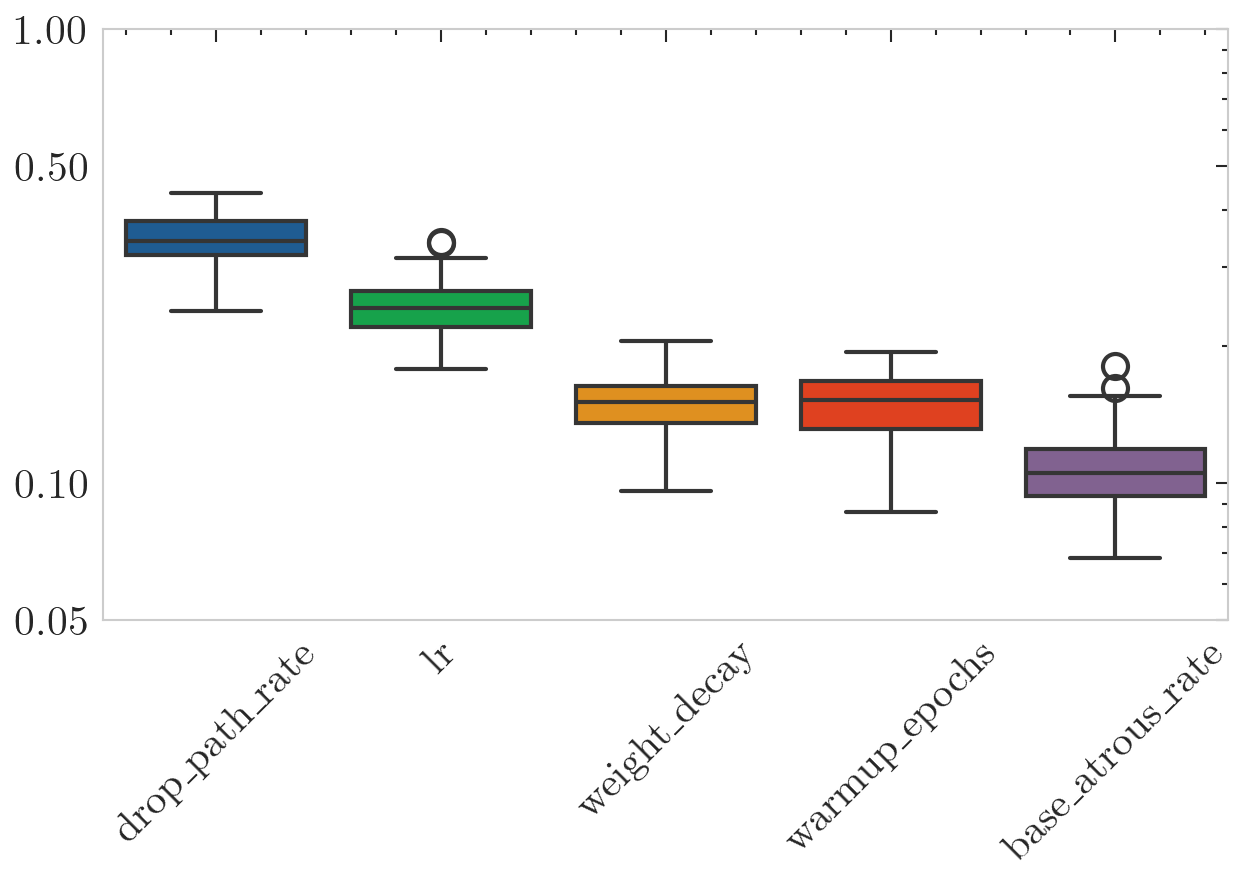

In [4]:
from collections import defaultdict

fig: plt.Figure
ax: plt.Axes

importances: defaultdict[str, float] = defaultdict(list)
for _ in range(100):
    for k, v in optuna.importance.get_param_importances(study).items():
        importances[k].append(v)

import pandas as pd

importances = pd.DataFrame.from_dict(importances)

import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(constrained_layout=True)
fig.set_size_inches(14.35 / 2.45 * 0.707, 14.35 / 2.45 * 0.707 * 0.707)
fig.set_dpi(300)
ax.grid(False)
boxplot = sns.boxplot(importances, ax=ax)
boxplot.set_yscale("log", base=10)
# ax.set_xticklabels([
#     "Learning Rate",
#     "Weight Decay",
#     "Base Dilation Rate",
#     "Append TGI",
#     "Append HSV",
#     "Stochastic Depth",
#     "Attention"
# ])
from matplotlib.ticker import FormatStrFormatter

ax.yaxis.set_major_formatter(FormatStrFormatter("%.2f"))
ax.set_yticks(ticks=[1, 0.5, 0.1, 0.05])
plt.xticks(rotation=45)

In [5]:
importances.mean()

drop_path_rate      0.345489
lr                  0.245741
weight_decay        0.151038
warmup_epochs       0.149952
base_atrous_rate    0.107780
dtype: float64

In [ ]:
from optuna.visualization import plot_optimization_history, plot_parallel_coordinate

for name, func in {  # "EDF":plot_edf,
    "OptimizationHistory": plot_optimization_history,
    "ParallelCoordinate": plot_parallel_coordinate,
}.items():
    fig = func(study)
    fig.update_layout(dict(title=""))
    fig.write_image(
        rf"C:\Users\Dimit\Desktop\figs\results\Round3{name}.png", width=1247, height=883
    )

C:\Documents\RoofSense\venv\Lib\site-packages\optuna\visualization\_terminator_improvement.py:131: ExperimentalWarning: RegretBoundEvaluator is experimental (supported from v3.2.0). The interface can change in the future.
  improvement_evaluator = RegretBoundEvaluator()
C:\Documents\RoofSense\venv\Lib\site-packages\optuna\visualization\_terminator_improvement.py:136: ExperimentalWarning: CrossValidationErrorEvaluator is experimental (supported from v3.2.0). The interface can change in the future.
  error_evaluator = CrossValidationErrorEvaluator()
100%|██████████| 50/50 [00:01<00:00, 31.28it/s]
C:\Documents\RoofSense\venv\Lib\site-packages\optuna\visualization\_terminator_improvement.py:131: ExperimentalWarning: RegretBoundEvaluator is experimental (supported from v3.2.0). The interface can change in the future.
  improvement_evaluator = RegretBoundEvaluator()
100%|██████████| 50/50 [00:02<00:00, 24.80it/s]


<Axes: >

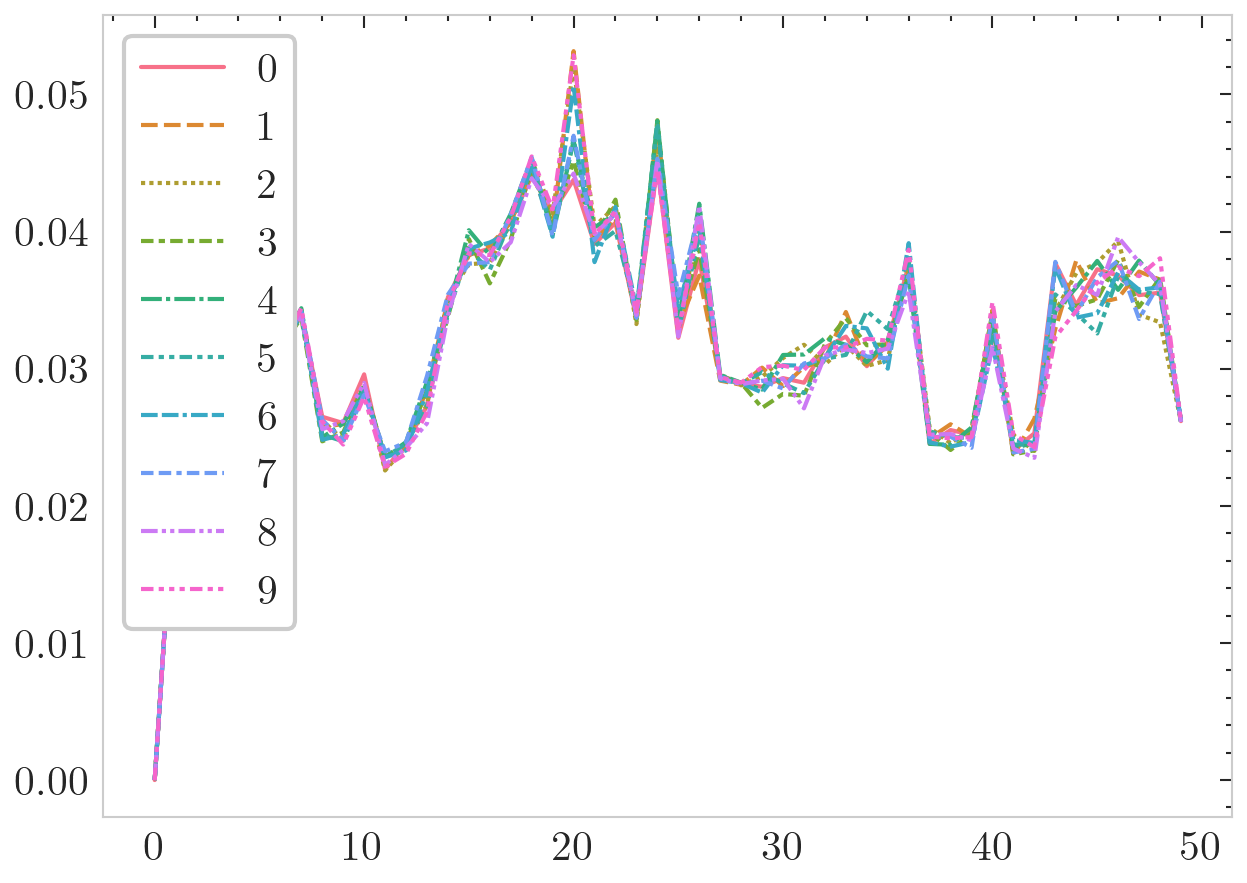

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from optuna.visualization._terminator_improvement import _get_improvement_info

improvements = {}
for i in range(10):
    improvements[i] = _get_improvement_info(study).improvements
improvements = pd.DataFrame.from_dict(improvements)
fig, ax = plt.subplots(constrained_layout=True)
fig.set_size_inches(14.35 / 2.45 * 0.707, 14.35 / 2.45 * 0.707 * 0.707)
fig.set_dpi(300)
ax.grid(False)
sns.lineplot(improvements)

In [ ]:
import matplotlib.pyplot as plt
from optuna.visualization._rank import _get_rank_info, _get_tick_info, _RankPlotInfo
from optuna.visualization.matplotlib._rank import _add_rank_subplot


def _get_rank_plot(info: _RankPlotInfo) -> "Axes":
    params = info.params
    sub_plot_infos = info.sub_plot_infos

    plt.style.use("ggplot")  # Use ggplot style sheet for similar outputs to plotly.

    title = f"Rank ({info.target_name})"

    nominal_size = 14.35
    plot_params = dict(
        figsize=(nominal_size / 2.54 * 3, nominal_size / 2.54), layout="constrained"
    )

    n_params = len(params)
    if n_params == 0:
        _, ax = plt.subplots(**plot_params)
        ax.set_title(title)
        return ax
    if n_params == 1 or n_params == 2:
        fig, axs = plt.subplots(**plot_params)
        axs.set_title(title)
        pc = _add_rank_subplot(axs, sub_plot_infos[0][0])
    else:
        fig, axs = plt.subplots(n_params, n_params, **plot_params)
        fig.suptitle(title)

        for x_i in range(n_params):
            for y_i in range(n_params):
                ax = axs[x_i, y_i]
                # Set the x or y label only if the subplot is in the edge of the overall figure.
                pc = _add_rank_subplot(
                    ax,
                    sub_plot_infos[x_i][y_i],
                    set_x_label=x_i == (n_params - 1),
                    set_y_label=y_i == 0,
                )

    tick_info = _get_tick_info(info.zs)

    pc.set_cmap(plt.get_cmap("RdYlBu_r"))
    cbar = fig.colorbar(pc, ax=axs, ticks=tick_info.coloridxs)
    cbar.ax.set_yticklabels(tick_info.text)
    cbar.outline.set_edgecolor("gray")
    return axs


info = _get_rank_info(
    study,
    params=["lr", "drop_path_rate", "weight_decay", "warmup_epochs"],
    target=None,
    target_name="Objective Value",
)

_get_rank_plot(info)